In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('/content/adult11.csv')

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   gender          48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  salary          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [27]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [28]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [29]:
df.duplicated().sum()

np.int64(52)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
for col in ['workclass', 'occupation', 'native-country']:
    mode_val = df[col].mode()[0]
    df[col] = df[col].replace('?', mode_val)

df.drop_duplicates(inplace=True)
for col in ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40.0,United-States,<=50K
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50.0,United-States,<=50K
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40.0,United-States,>50K
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40.0,United-States,>50K
4,18,Private,103497.0,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0,0,32.5,United-States,<=50K


<Axes: xlabel='salary', ylabel='count'>

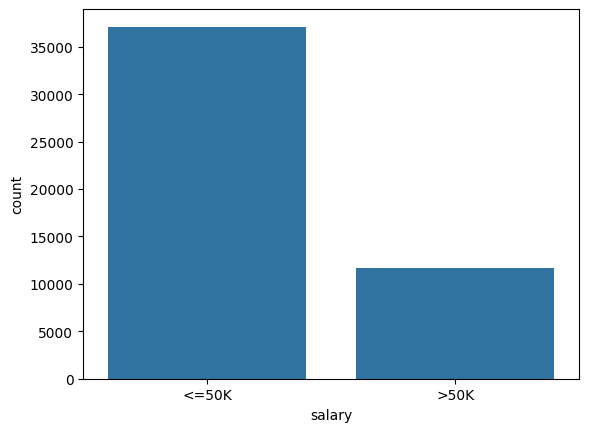

In [33]:
sns.countplot(x='salary', data=df)

Most people earn less than 50k

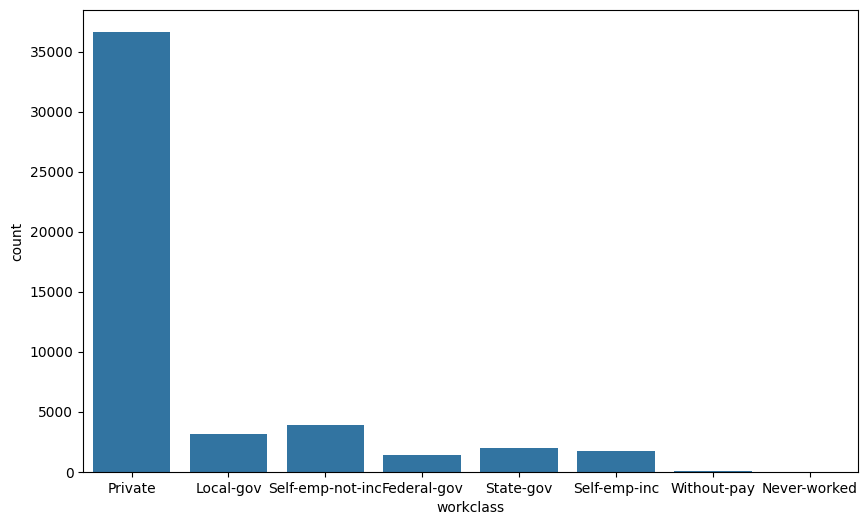

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=df)
plt.show()

Most of the people work in private sector

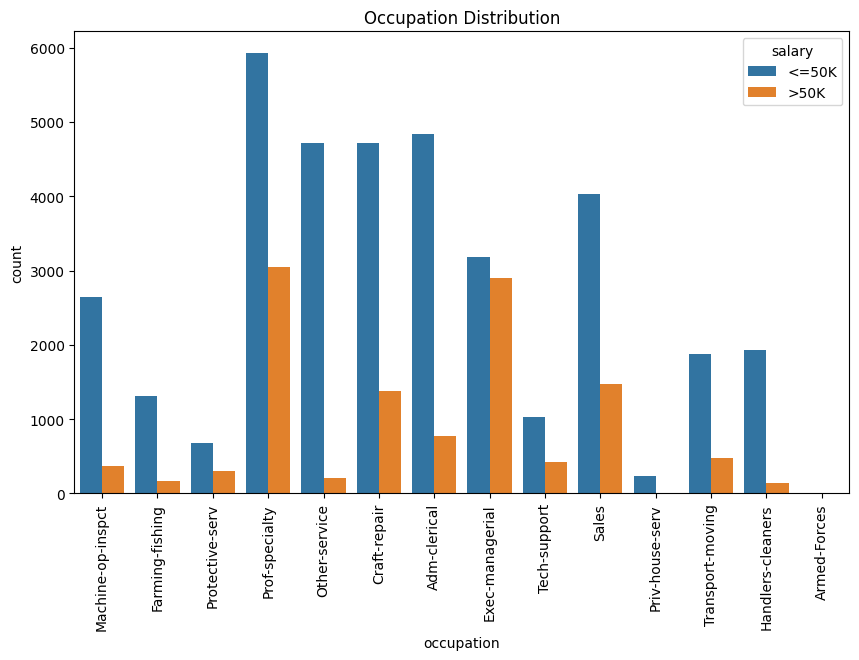

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation',hue='salary', data=df)
plt.title('Occupation Distribution')
plt.xticks(rotation=90)
plt.show()

Armed-Forces have less people

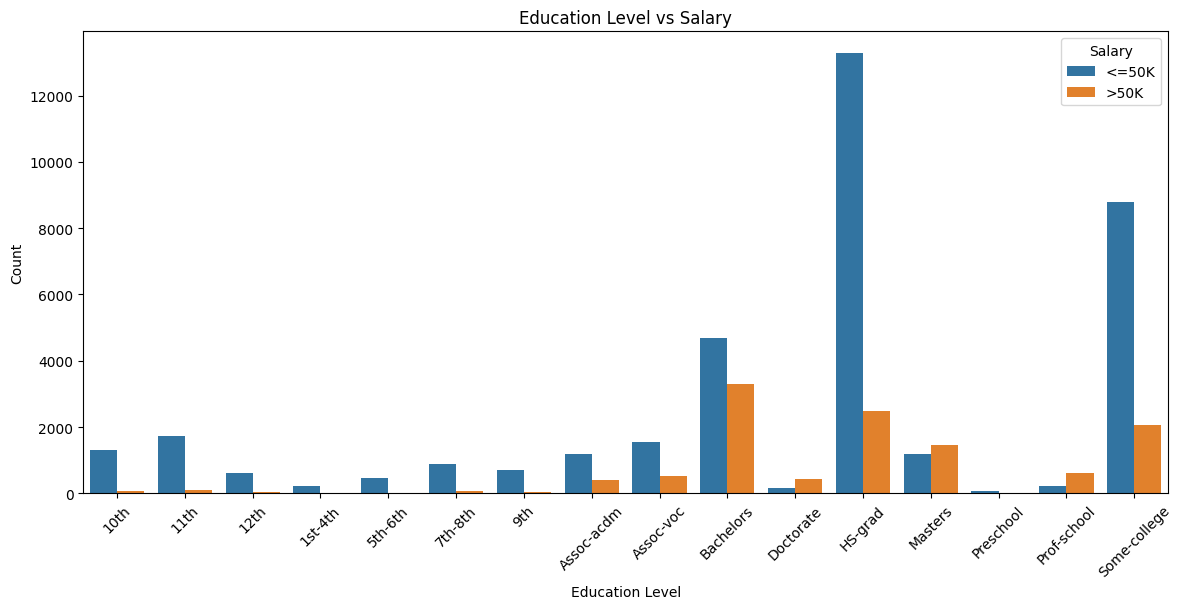

In [37]:
plt.figure(figsize=(14, 6))
order = sorted(df['education'].unique())
sns.countplot(x='education', hue='salary', data=df, order=order)
plt.title('Education Level vs Salary')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary')
plt.show()

Individuals with higher education levels (e.g., Bachelors, Masters, Doctorate) are significantly more likely to earn >50K.

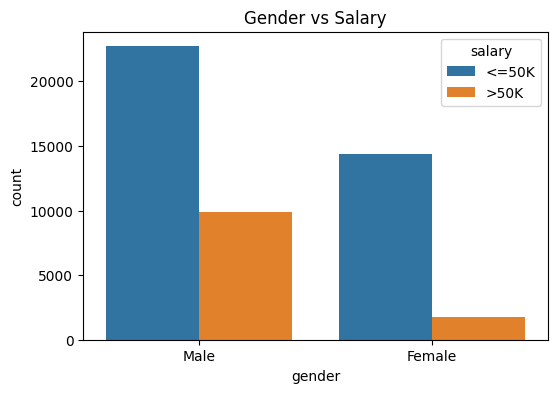

In [38]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='salary', data=df)
plt.title('Gender vs Salary')
plt.show()


Male got more job

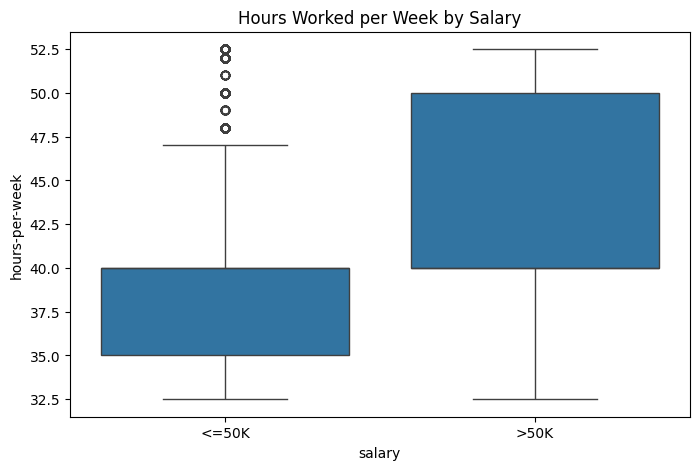

In [39]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='salary', y='hours-per-week', data=df)
plt.title('Hours Worked per Week by Salary')
plt.show()

More hour u work more salary u get